In [1]:
import pandas as pd

df = pd.read_csv('datasets/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

In [7]:
age_group_order = [
    'Under 1 year', 
    '1-4 years', 
    '5-14 years', 
    '15-24 years', 
    '25-34 years', 
    '35-44 years', 
    '45-54 years', 
    '55-64 years', 
    '65-74 years', 
    '75-84 years', 
    '85 years and over'
]

In [3]:
group_by_m_df = df[(df['Group'] == 'By Month') & (df['Sex'] == 'All Sexes') & (df['Age Group'] != 'All Ages') & (df['State'] != 'United States') & (df['Year'] != 2023)]
pattern1 = group_by_m_df['Age Group'].str.contains('Under 1 year|1-4 years|5-14 years|15-24 years|25-34 years|35-44 years|45-54 years|55-64 years|65-74 years|75-84 years|85 years and over')
group_by_m_df = group_by_m_df[pattern1]
group_by_m_df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
16066,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,Alabama,All Sexes,Under 1 year,0.0,31.0,0.0,0.0,0.0,0.0,NaN
16068,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,Alabama,All Sexes,1-4 years,0.0,12.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
16069,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,Alabama,All Sexes,5-14 years,0.0,16.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
16070,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,Alabama,All Sexes,15-24 years,0.0,56.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1-9...
16072,09/27/2023,01/01/2020,01/31/2020,By Month,2020.0,1.0,Alabama,All Sexes,25-34 years,0.0,77.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1-9...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137201,09/27/2023,12/01/2022,12/31/2022,By Month,2022.0,12.0,Puerto Rico,All Sexes,45-54 years,NaN,158.0,20.0,NaN,NaN,24.0,One or more data cells have counts between 1-9...
137203,09/27/2023,12/01/2022,12/31/2022,By Month,2022.0,12.0,Puerto Rico,All Sexes,55-64 years,11.0,329.0,39.0,NaN,NaN,47.0,One or more data cells have counts between 1-9...
137204,09/27/2023,12/01/2022,12/31/2022,By Month,2022.0,12.0,Puerto Rico,All Sexes,65-74 years,32.0,586.0,88.0,21.0,NaN,102.0,One or more data cells have counts between 1-9...
137205,09/27/2023,12/01/2022,12/31/2022,By Month,2022.0,12.0,Puerto Rico,All Sexes,75-84 years,49.0,908.0,147.0,31.0,NaN,170.0,One or more data cells have counts between 1-9...


In [18]:
group_by_m_df['Age Group'] = pd.Categorical(
    group_by_m_df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Sort the dataframe based on the categorical column
group_by_m_df = group_by_m_df.sort_values('Age Group')
heatmap_data = group_by_m_df.groupby(['Age Group','Year','Month'],observed=False)['COVID-19 Deaths'].sum()

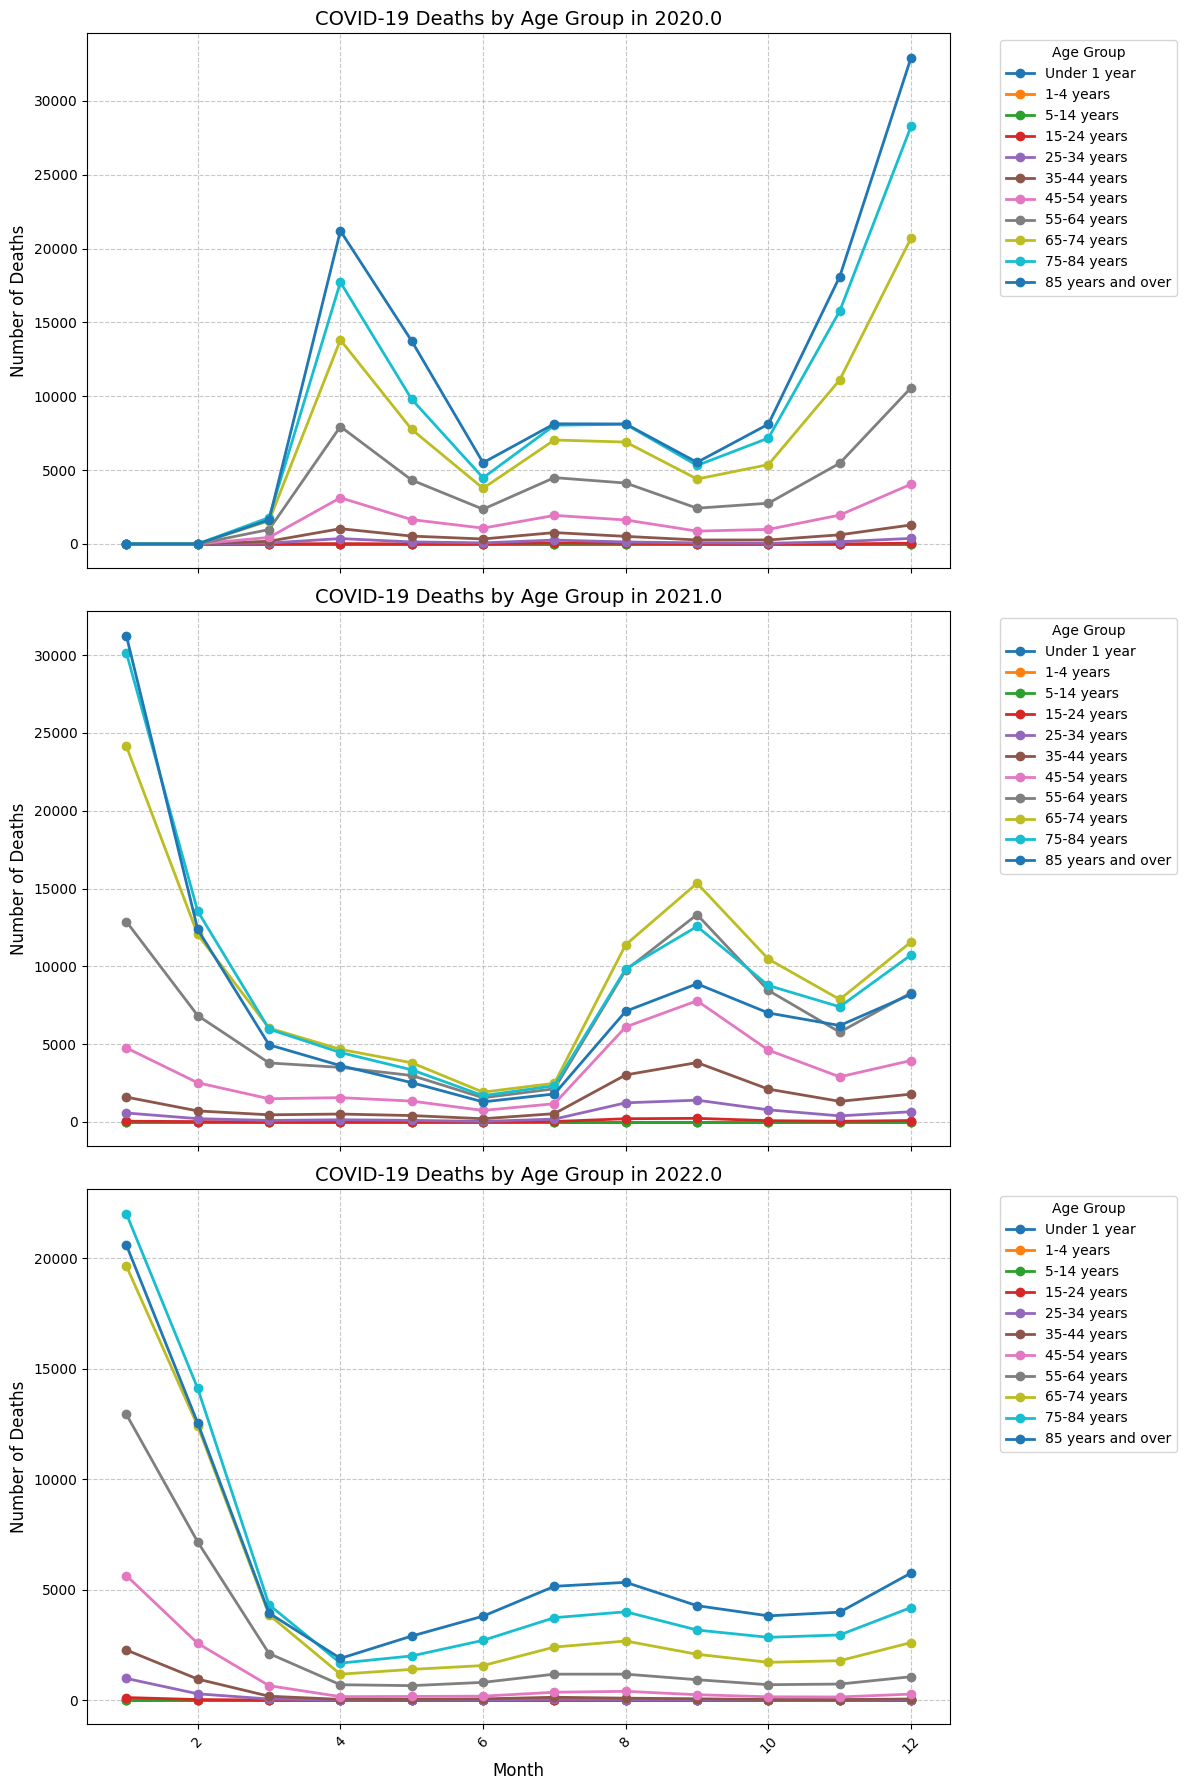

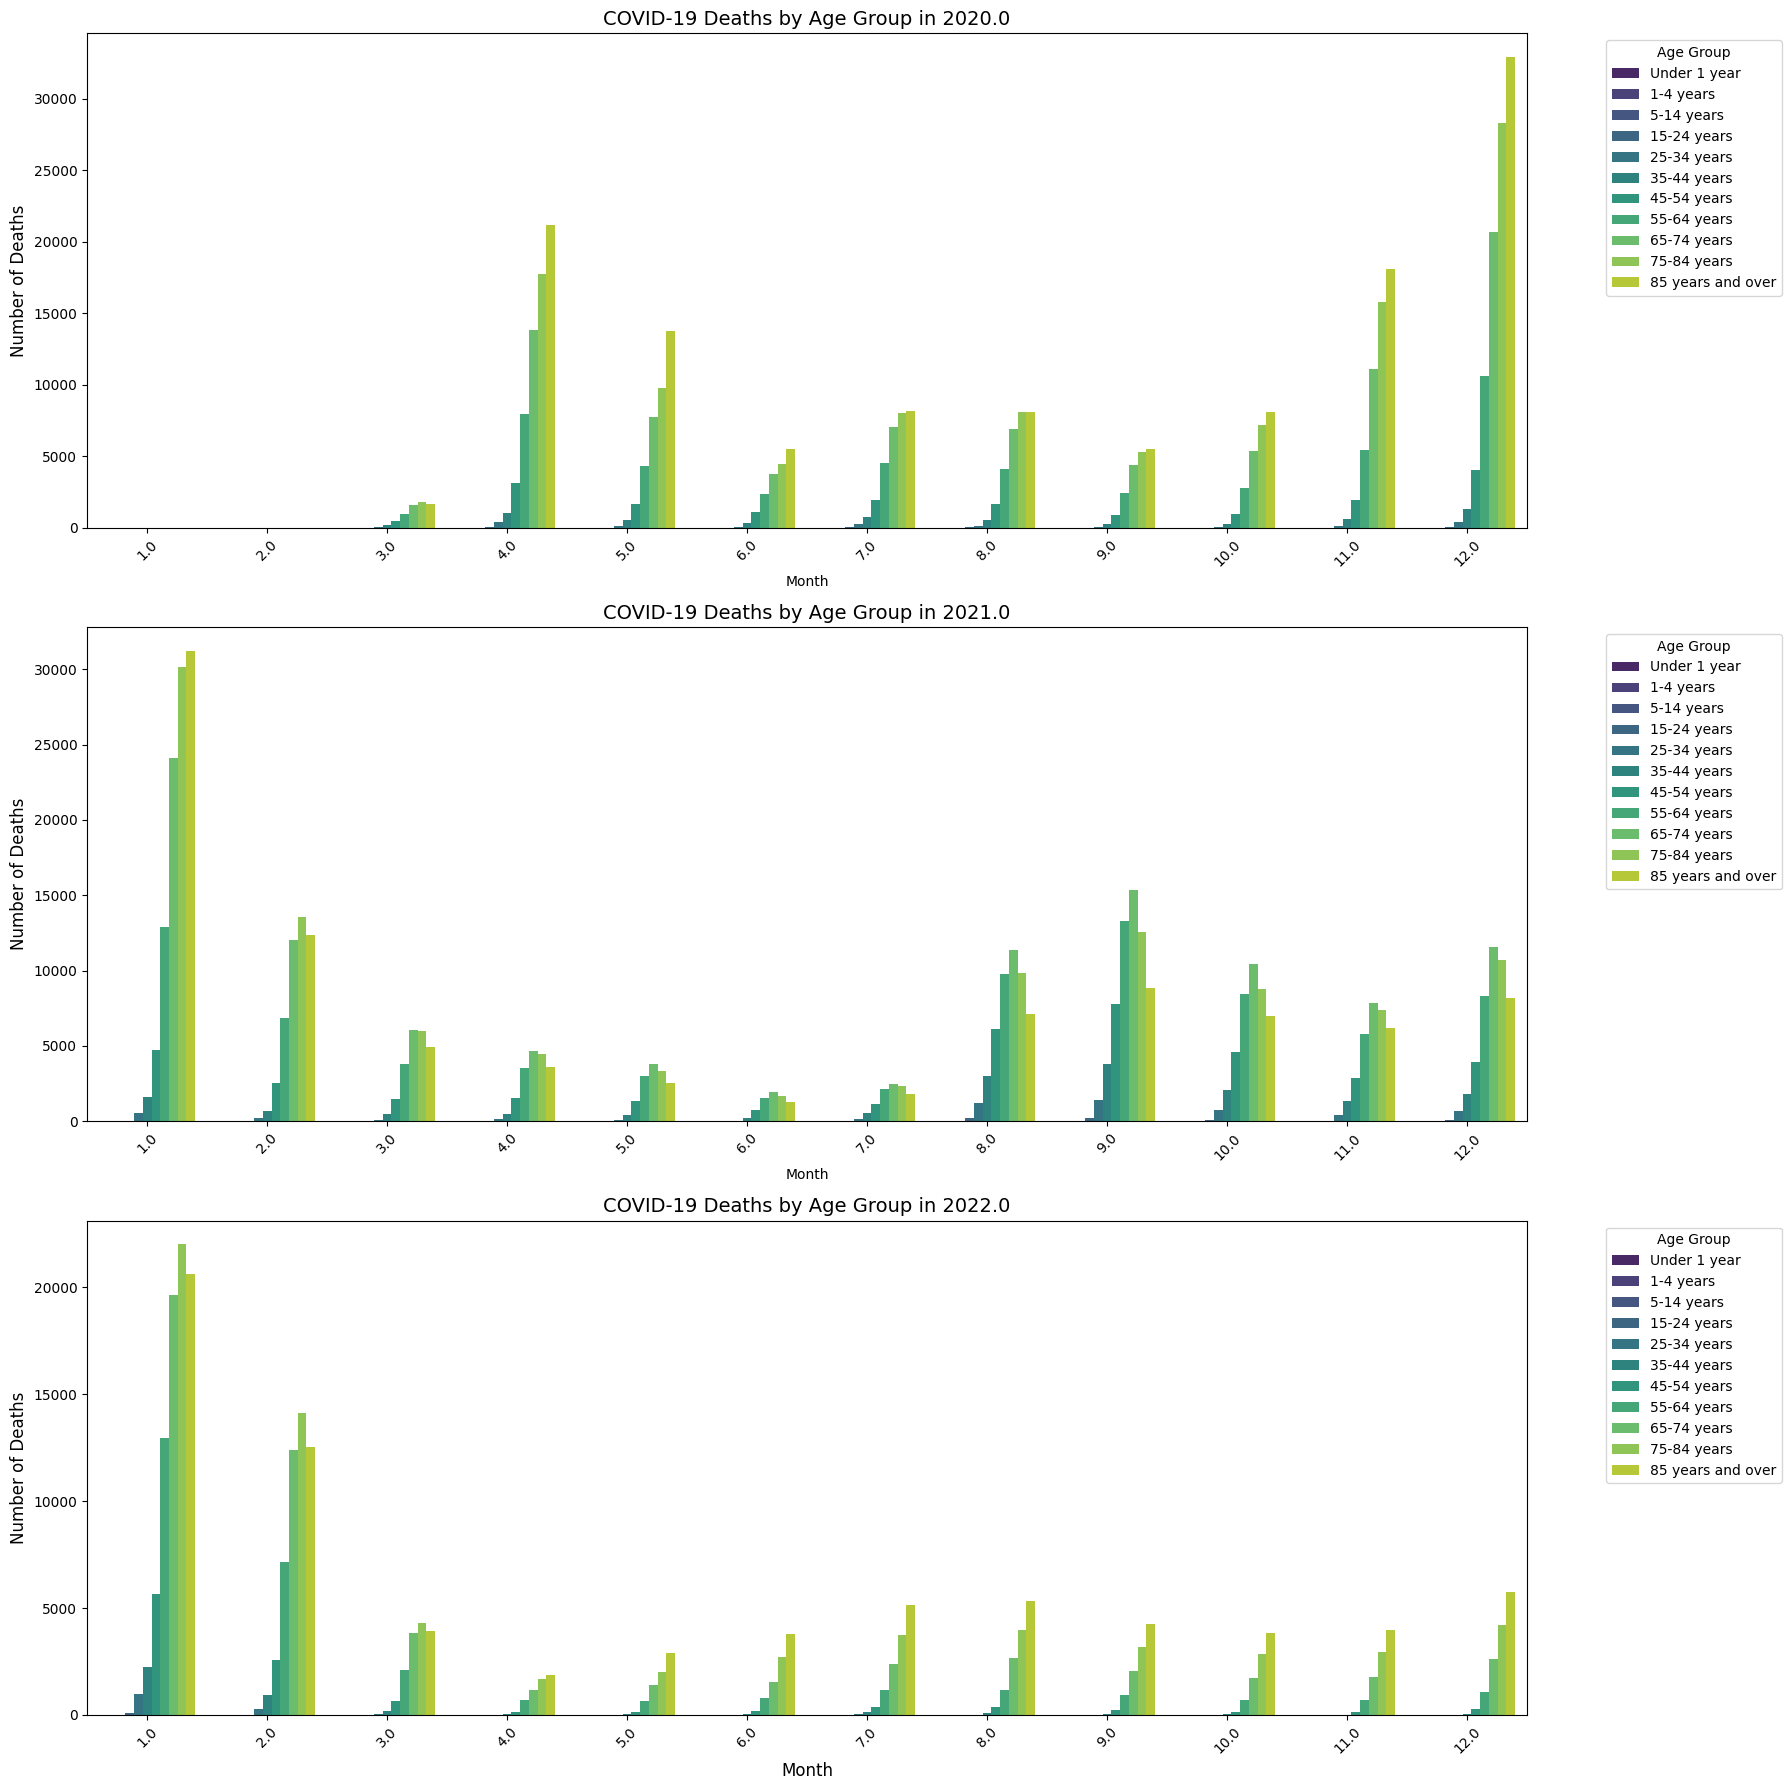

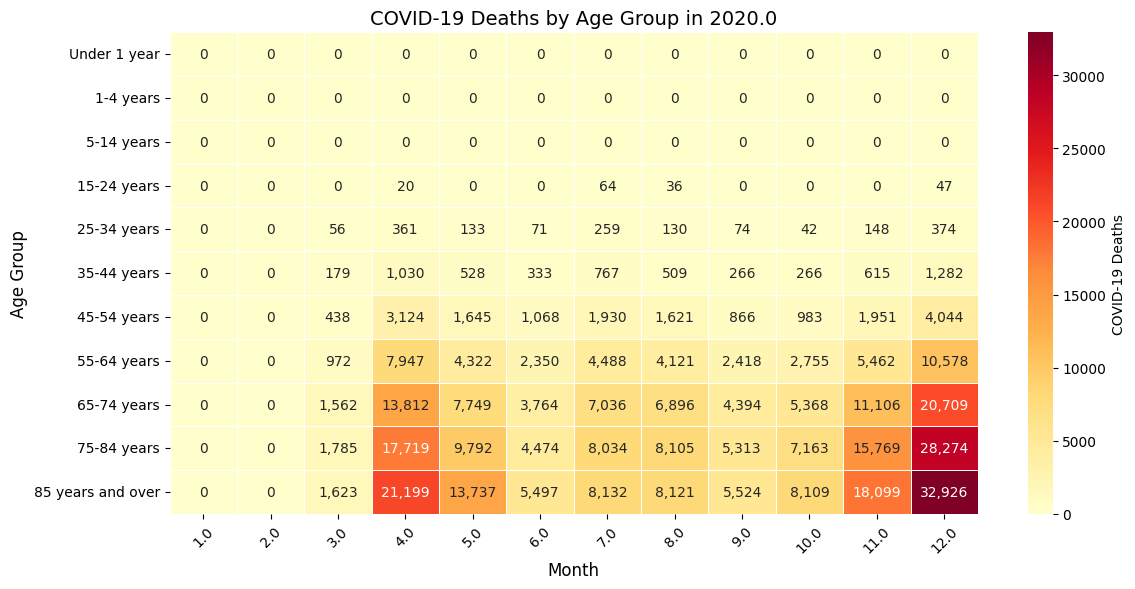

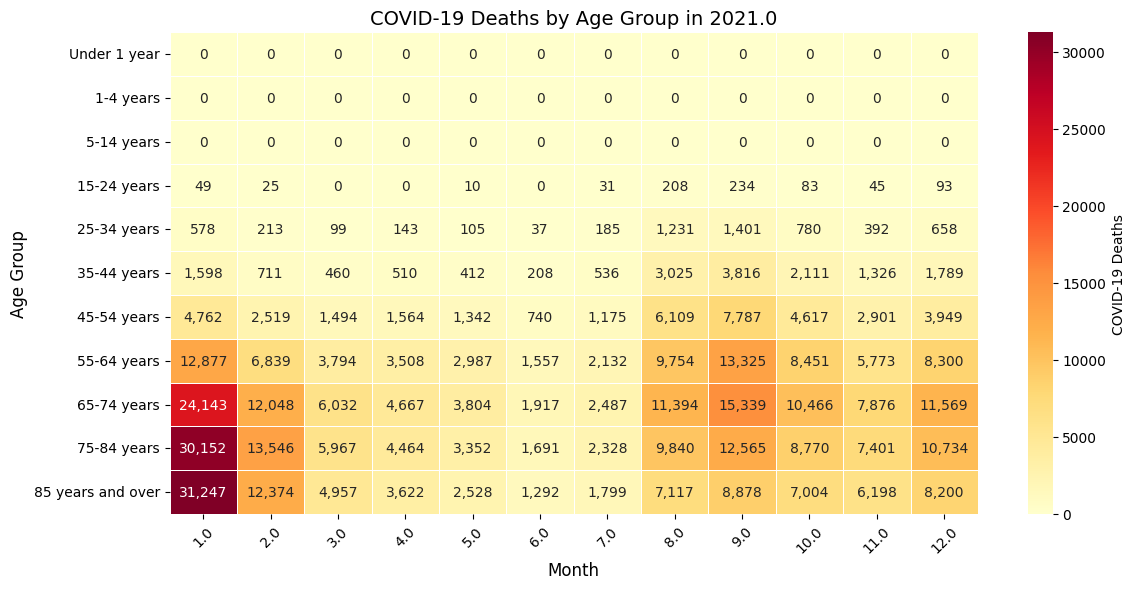

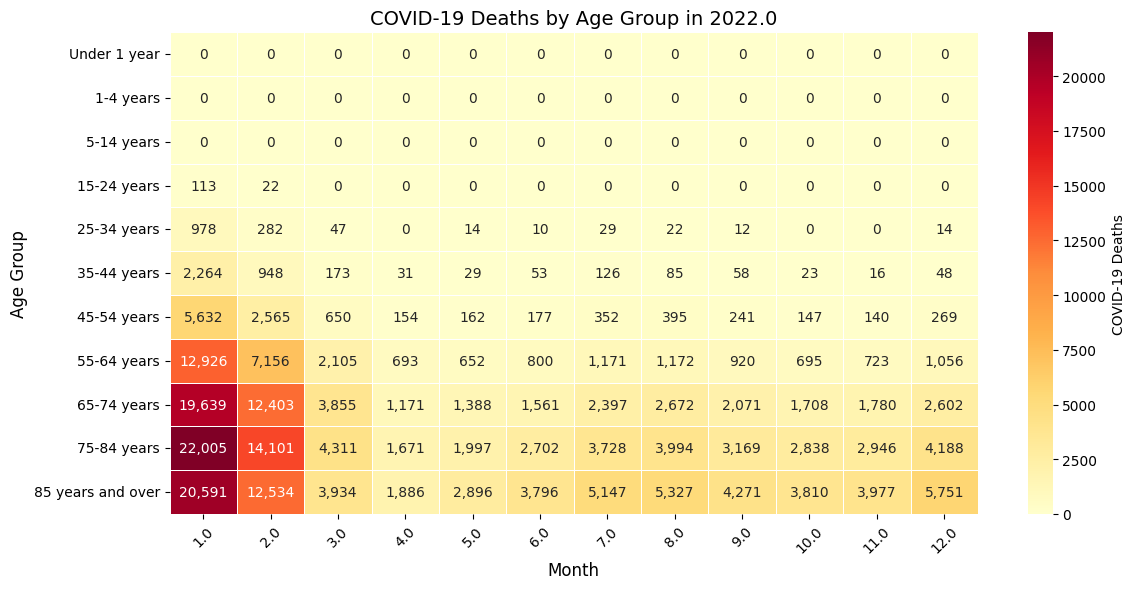

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reset index to get all grouping variables as columns
plot_data = heatmap_data.reset_index()

# Get unique years for creating separate graphs
years = sorted(plot_data['Year'].unique())

# Create a figure with subplots - one per year
fig, axes = plt.subplots(len(years), 1, figsize=(12, 6*len(years)), sharex=True)

# If there's only one year, wrap axes in a list to make the code work
if len(years) == 1:
    axes = [axes]

# Create a separate line chart for each year
for i, year in enumerate(years):
    # Filter data for the current year
    year_data = plot_data[plot_data['Year'] == year]
    
    # Pivot the data for plotting
    pivot_data = year_data.pivot(index='Age Group', columns='Month', values='COVID-19 Deaths')
    
    # Plot each age group as a line for the current year
    for age_group in pivot_data.index:
        axes[i].plot(pivot_data.columns, pivot_data.loc[age_group], marker='o', 
                   linewidth=2, label=age_group)
    
    # Customize each subplot
    axes[i].set_title(f'COVID-19 Deaths by Age Group in {year}', fontsize=14)
    axes[i].set_ylabel('Number of Deaths', fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    axes[i].legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set the x-label only for the bottom subplot
axes[-1].set_xlabel('Month', fontsize=12)

# Adjust x-tick labels on all subplots
for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Alternative: Create separate bar charts for each year
plt.figure(figsize=(18, 6*len(years)))

for i, year in enumerate(years):
    plt.subplot(len(years), 1, i+1)
    
    # Filter data for the current year
    year_data = plot_data[plot_data['Year'] == year]
    
    # Create bar chart
    sns.barplot(x='Month', y='COVID-19 Deaths', hue='Age Group', 
                data=year_data, palette='viridis')
    
    plt.title(f'COVID-19 Deaths by Age Group in {year}', fontsize=14)
    plt.ylabel('Number of Deaths', fontsize=12)
    if i == len(years)-1:  # Only add x-label to bottom subplot
        plt.xlabel('Month', fontsize=12)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Additional option: Heatmaps by year
for year in years:
    plt.figure(figsize=(12, 6))
    
    # Filter data for the current year
    year_data = plot_data[plot_data['Year'] == year]
    
    # Create pivot table for heatmap
    pivot_data = year_data.pivot(index='Age Group', columns='Month', values='COVID-19 Deaths')
    
    # Create heatmap
    sns.heatmap(pivot_data, annot=True, fmt=",.0f", cmap="YlOrRd", 
                linewidths=0.5, cbar_kws={'label': 'COVID-19 Deaths'})
    
    plt.title(f'COVID-19 Deaths by Age Group in {year}', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Age Group', fontsize=12)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()